# masking

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plantclef.spark import get_spark

spark = get_spark()
display(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/25 23:20:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/25 23:20:51 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [3]:
import os
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path(os.path.expanduser("~"))
! date

Tue Feb 25 11:20:54 PM EST 2025


In [6]:
# Path and dataset names
data_path = f"{root}/scratch/plantclef/data/"

# Define the path to the train and test parquet files
mask_path = f"{data_path}/masking/test_2024/data"
test_path = f"{data_path}/parquet/test_2024"

# Read the parquet files into a spark DataFrame
mask_df = spark.read.parquet(mask_path)
test_df = spark.read.parquet(test_path)

# Show the data
mask_df.printSchema()
mask_df.show(n=5)
test_df.printSchema()
test_df.show(n=5)

root
 |-- image_name: string (nullable = true)
 |-- combined_mask: binary (nullable = true)
 |-- leaf_mask: binary (nullable = true)
 |-- flower_mask: binary (nullable = true)
 |-- plant_mask: binary (nullable = true)
 |-- sample_id: integer (nullable = true)



+--------------------+--------------------+--------------------+--------------------+--------------------+---------+
|          image_name|       combined_mask|           leaf_mask|         flower_mask|          plant_mask|sample_id|
+--------------------+--------------------+--------------------+--------------------+--------------------+---------+
|CBN-PdlC-B2-20160...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
|CBN-Pla-B6-201809...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
|CBN-Pla-A1-201908...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
|CBN-Pla-A5-201607...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
|CBN-Pla-D6-201807...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
+--------------------+--------------------+--------------------+

+--------------------+--------------------+--------------------+
|          image_name|                path|                data|
+--------------------+--------------------+--------------------+
|CBN-PdlC-C6-20130...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-Pla-D3-201508...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-C3-20190...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-C1-20200...|/test_2024/images...|[FF D8 FF E0 00 1...|
|CBN-PdlC-B2-20160...|/test_2024/images...|[FF D8 FF E0 00 1...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [11]:
# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_df = test_df.limit(rows * cols).cache()
mask_subset_df = subset_df.join(mask_df, "image_name").cache()
mask_subset_df.show(n=5)

25/02/25 23:28:29 WARN CacheManager: Asked to cache already cached data.


+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+
|          image_name|                path|                data|       combined_mask|           leaf_mask|         flower_mask|          plant_mask|sample_id|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+
|CBN-PdlC-A3-20180...|/test_2024/images...|[FF D8 FF E0 00 1...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
|CBN-PdlC-B2-20160...|/test_2024/images...|[FF D8 FF E0 00 1...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
|CBN-PdlC-C6-20130...|/test_2024/images...|[FF D8 FF E0 00 1...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|[89 50 4E 47 0D 0...|        0|
|CBN-PdlC-B6-20150...|/test_2024/images...|[FF

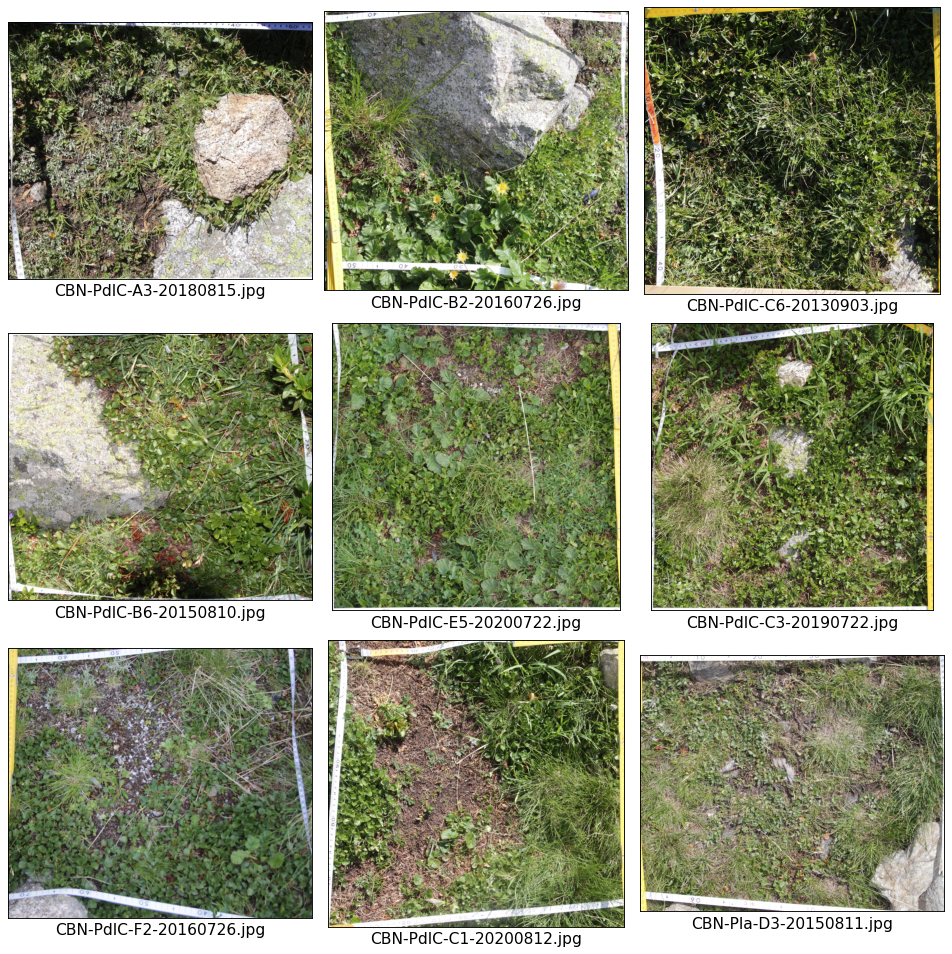

In [10]:
from plantclef.plotting import plot_images_from_binary

# Display the images in a grid with binomial names
plot_images_from_binary(
    mask_subset_df, data_col="data", image_col="image_name", grid_size=(3, 3)
)

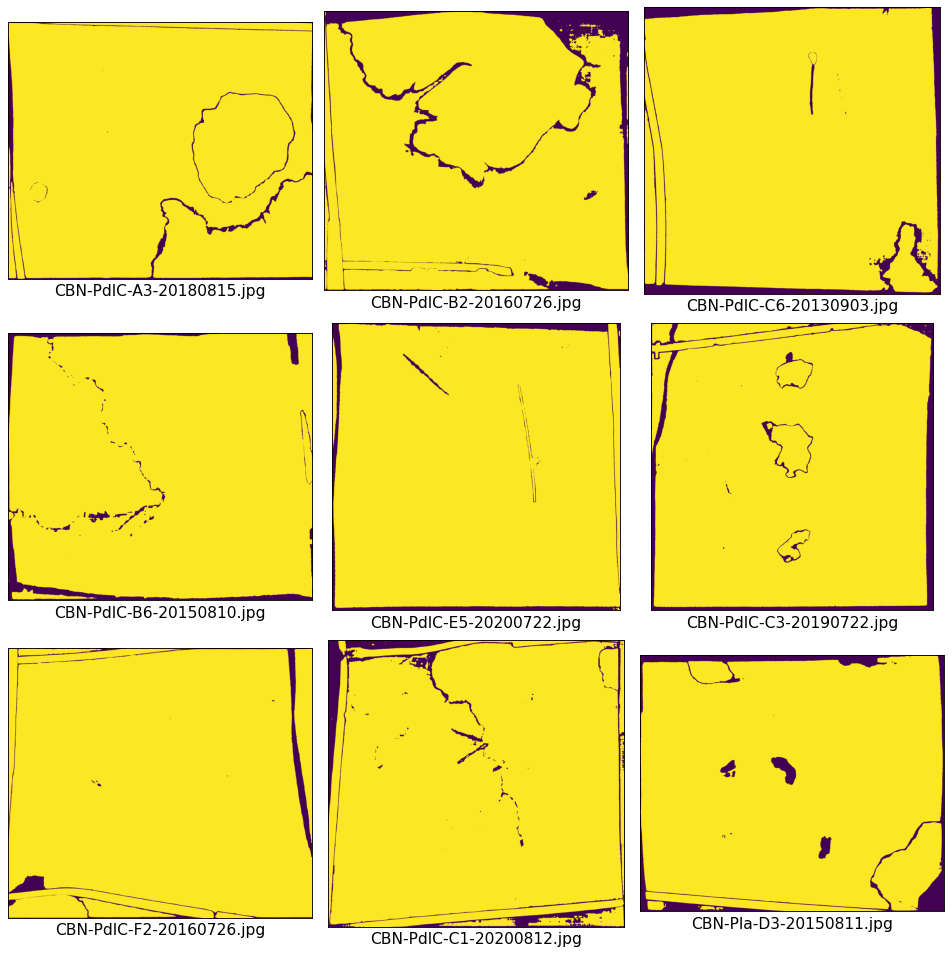

In [16]:
# Display the images in a grid with binomial names
plot_images_from_binary(
    mask_subset_df,
    data_col="combined_mask",
    image_col="image_name",
    grid_size=(3, 3),
    grayscale=False,
)

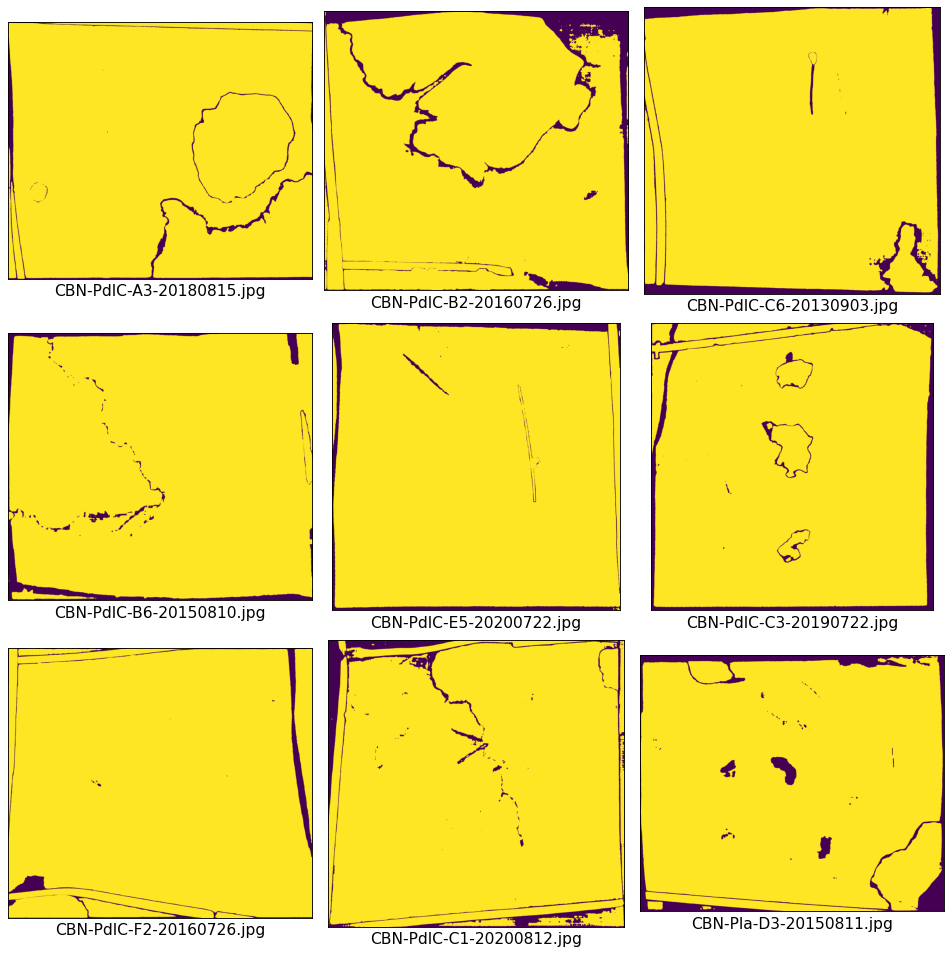

In [17]:
# Display the images in a grid with binomial names
plot_images_from_binary(
    mask_subset_df, data_col="leaf_mask", image_col="image_name", grid_size=(3, 3)
)